In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import StackingRegressor 
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import AdaBoostRegressor

In [31]:
# Load the dataset
file_path = r'C:\Users\grshr\OneDrive\Desktop\AIwithTensorflow Project\garments_worker_productivity.csv'
df = pd.read_csv(file_path)


In [32]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [34]:
    df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [35]:
df['wip'] = df['wip'].fillna(df['wip'].mean())


In [36]:
df.drop(['date', 'targeted_productivity'], axis=1, inplace=True) 
df.head()

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [37]:
df = df.rename(columns={
    'team': 'team_number',
    'smv': 'time_allocated',
    'wip': 'unfinished_items',
    'no_of_style_change': 'style_change'
})
df

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [38]:
df['quarter'].unique()


array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [39]:
df['quarter'] = df['quarter'].str.replace('Quarter5', 'Quarter1')

In [40]:
df['quarter'] = df['quarter'].str.extract(r'(\d+)')
df['quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1192    2
1193    2
1194    2
1195    2
1196    2
Name: quarter, Length: 1197, dtype: object

In [41]:
df['department'] = df['department'].str.replace('sweing','sewing')
df['department'] = df['department'].str.replace('finishing ','finishing')

In [84]:
df['team_number'] = df['team_number'].astype(int)
df['over_time'] = df['over_time'].astype(int)
df['incentive'] = df['incentive'].astype(int)
df['idle_time'] = df['idle_time'].astype(int)
df['idle_men'] = df['idle_men'].astype(int) 
df['style_change'] = df['style_change'].astype(int)
df['time_allocated'] = df['time_allocated'].astype(int)
df['unfinished_items'] = df['unfinished_items'].astype(int)
df['idle_time'] = df['idle_time'].astype(int)
df['no_of_workers'] = df['no_of_workers'].astype(int)
x_test['quarter'] = x_test['quarter'].astype('category')

In [43]:
lc = LabelEncoder()

In [44]:
print('Before encoding:', df['department'].unique())
df['department'] = lc.fit_transform(df['department'])
print('After encoding:', df['department'].unique())


Before encoding: ['sewing' 'finishing']
After encoding: [1 0]


In [45]:
print('Before encoding:', df['day'].unique())
df['day'] = lc.fit_transform(df['day'])
print('After encoding:', df['day'].unique())

Before encoding: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
After encoding: [3 1 2 0 4 5]


In [46]:
df.describe(include = 'all')

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.577277,2.534670,6.426901,14.508772,1190.269006,4567.460317,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,NaN,0.494199,1.714538,3.463963,11.067638,1395.647280,3348.823563,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,NaN,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,0.000000,1.000000,3.000000,3.000000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,1.000000,3.000000,6.000000,15.000000,1190.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,1.000000,4.000000,9.000000,24.000000,1190.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


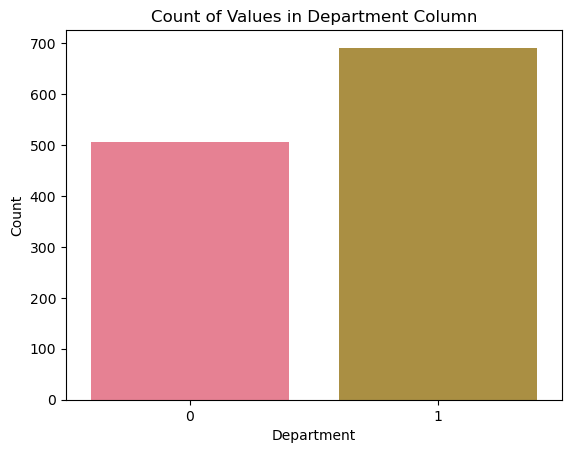

In [47]:
sns.countplot(data=df, x='department') 
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Values in Department Column') 
plt.show()

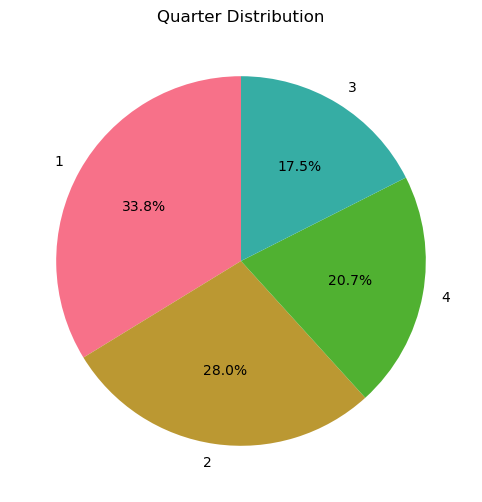

In [48]:
quarter_counts = df['quarter'].value_counts()
plt.figure(figsize=(8, 6))
sns.set_palette("husl") # Set custom color palette
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Quarter Distribution')
plt.show()


C:\Users\grshr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\grshr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


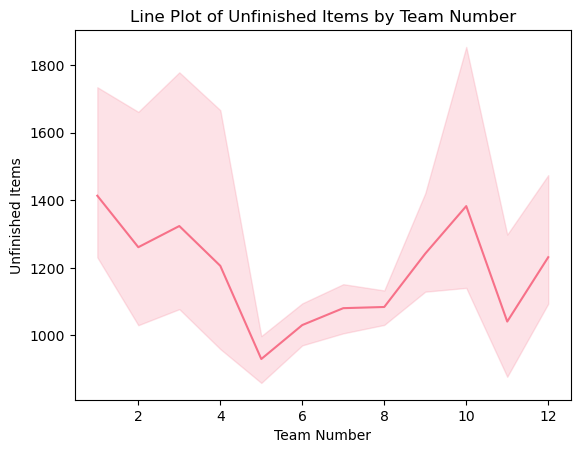

In [49]:
sns.lineplot(data=df, x='team_number', y='unfinished_items') 
plt.xlabel('Team Number')
plt.ylabel('Unfinished Items')
plt.title('Line Plot of Unfinished Items by Team Number') 
plt.show()

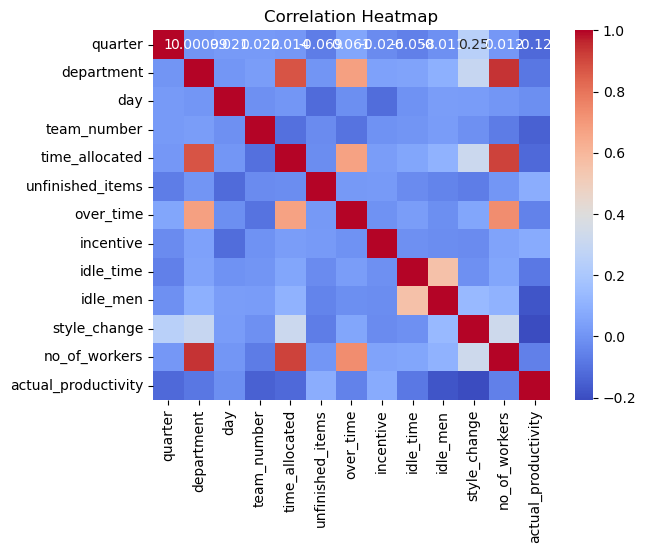

In [50]:
# Create a heatmap of correlation between numerical variables with a larger size plt.figure(figsize=(10, 8)) # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap')
plt.show()

In [51]:
x = df.drop(['actual_productivity'],axis=1)
x

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers
0,1,1,3,8,26,1108,7080,98,0,0,0,59
1,1,0,3,1,3,1190,960,0,0,0,0,8
2,1,1,3,11,11,968,3660,50,0,0,0,30
3,1,1,3,12,11,968,3660,50,0,0,0,30
4,1,1,3,6,25,1170,1920,50,0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,0,5,10,2,1190,960,0,0,0,0,8
1193,2,0,5,8,3,1190,960,0,0,0,0,8
1194,2,0,5,7,3,1190,960,0,0,0,0,8
1195,2,0,5,9,2,1190,1800,0,0,0,0,15


In [52]:
y = df['actual_productivity']
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [53]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 25) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(957, 12)
(240, 12)
(957,)
(240,)


In [54]:
sc = StandardScaler()
X_scaled = sc.fit_transform(x)

In [55]:
col = x.columns

In [56]:
X_scaled = pd.DataFrame(X_scaled,columns = col)
X_scaled

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers
0,-1.107736,0.855729,0.271516,0.454323,1.038707,-0.058971,0.750589,0.373414,-0.057278,-0.113005,-0.351617,1.104109
1,-1.107736,-1.168594,0.271516,-1.567329,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
2,-1.107736,0.855729,0.271516,1.320745,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542
3,-1.107736,0.855729,0.271516,1.609552,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542
4,-1.107736,0.855729,0.271516,-0.123292,0.948316,-0.014529,-0.790895,0.073631,-0.057278,-0.113005,-0.351617,0.968628
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,-0.223173,-1.168594,1.438498,1.031937,-1.130684,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1193,-0.223173,-1.168594,1.438498,0.454323,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1194,-0.223173,-1.168594,1.438498,0.165515,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1195,-0.223173,-1.168594,1.438498,0.743130,-1.130684,-0.000193,-0.826743,-0.238643,-0.057278,-0.113005,-0.351617,-0.882948


In [57]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
dtr = DecisionTreeRegressor(max_depth= 4, min_samples_split = 3, min_samples_leaf = 2)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [59]:
rfr = RandomForestRegressor(n_estimators = 100,
                             max_depth=6,
                             min_weight_fraction_leaf = 0.05, 
                             max_features = 0.8, random_state = 42)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, random_state=42)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(x_train, y_train)
print(gbr)


GradientBoostingRegressor(max_depth=1, random_state=42)


In [73]:
# Assuming 'quarter' is categorical and other columns are numeric
# Convert 'quarter' to categorical if not already
x_train['quarter'] = x_train['quarter'].astype('category')

# Use XGBoost with enable_categorical=True
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_leaves=3, random_state=1, enable_categorical=True)
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [66]:
base_model = XGBRegressor (n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)
bagging_reg = BaggingRegressor (base_model, n_estimators=100, random_state=42)
bagging_reg.fit(x_train, y_train)

BaggingRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.06, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=2,
                                        max_leaves=3, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=700,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=1, ...),
                 n_estimators=100, random_state=42)

In [67]:
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)
boosting_reg = AdaBoostRegressor (base_model, n_estimators=100, learning_rate=0.1, random_state=42)
boosting_reg.fit(x_train, y_train)

AdaBoostRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=0.06, max_bin=None,
                                         max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=2,
                                         max_leaves=3, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=700,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=1, ...),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [85]:
predict_train = xgb.predict(x_train)

In [82]:
mse = mean_squared_error(y_train, predict_train) 
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)

Root Mean Squared Error: 0.12341037920267399


In [86]:
# Assuming 'xgb' is your trained XGBoost model
predict_test = xgb.predict(x_test)
mse_test = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse_test)
print('Root Mean Squared Error on Test Set:', rmse_lr_test)


Root Mean Squared Error on Test Set: 0.12113299401209802


In [90]:
predict_train_dtr = dtr.predict(x_train)  # Making predictions on the training set
mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error on Training Set (Decision Tree):', rmse_dtr_train)


Root Mean Squared Error on Training Set (Decision Tree): 0.13187559206436333


In [91]:
predict_test_dtr = dtr.predict(x_test)  # Making predictions on the test set
mse_test = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse_test)
print('Root Mean Squared Error on Test Set (Decision Tree):', rmse_dtr_test)


Root Mean Squared Error on Test Set (Decision Tree): 0.1291887583102271


In [92]:
predict_train_rfr = rfr.predict(x_train)  # Making predictions on the training set
mse_train_rfr = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse_train_rfr)
print('Root Mean Squared Error on Training Set (Random Forest):', rmse_rfr_train)

Root Mean Squared Error on Training Set (Random Forest): 0.13066329578222882


In [93]:
predict_test_rfr = rfr.predict(x_test)  # Making predictions on the test set
mse_test_rfr = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse_test_rfr)
print('Root Mean Squared Error on Test Set (Random Forest):', rmse_rfr_test)

Root Mean Squared Error on Test Set (Random Forest): 0.12721255996349562


In [97]:
predict_train_gbr = gbr.predict(x_train)  # Making predictions on the training set
mse_train_gbr = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse_train_gbr)
print('Root Mean Squared Error on Training Set (Gradient Boosting):', rmse_gbr_train)

Root Mean Squared Error on Training Set (Gradient Boosting): 0.14244277376076936


In [98]:
predict_test_gbr = gbr.predict(x_test)  # Making predictions on the test set
mse_test_gbr = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse_test_gbr)
print('Root Mean Squared Error on Test Set (Gradient Boosting):', rmse_gbr_test)

Root Mean Squared Error on Test Set (Gradient Boosting): 0.1394815884261522


In [99]:
predict_train_xgb = xgb.predict(x_train)  # Making predictions on the training set
mse_train_xgb = mean_squared_error(y_train, predict_train_xgb)
rmse_xgb_train = np.sqrt(mse_train_xgb)
print('Root Mean Squared Error on Training Set (XGBoost):', rmse_xgb_train)


Root Mean Squared Error on Training Set (XGBoost): 0.12341037920267399


In [100]:
from sklearn.metrics import mean_squared_error

# Assuming 'xgb' is your trained XGBoost model
predict_test_xgb = xgb.predict(x_test)  # Making predictions on the test set
mse_test_xgb = mean_squared_error(y_test, predict_test_xgb)
rmse_xgb_test = np.sqrt(mse_test_xgb)
print('Root Mean Squared Error on Test Set (XGBoost):', rmse_xgb_test)


Root Mean Squared Error on Test Set (XGBoost): 0.12113299401209802


In [102]:
y_train_pred_b = bagging_reg.predict(x_train)  # Predictions on training set
y_test_pred_b = bagging_reg.predict(x_test)    # Predictions on test set

train_rmse_b = np.sqrt(mean_squared_error(y_train, y_train_pred_b))
test_rmse_b = np.sqrt(mean_squared_error(y_test, y_test_pred_b))

print("Bagging Regressor:")
print(f"Training RMSE: {train_rmse_b}")
print(f"Testing RMSE: {test_rmse_b}")


Bagging Regressor:
Training RMSE: 0.11535605467787764
Testing RMSE: 0.11702569725241972


In [103]:
y_train_pred_gbr = gbr.predict(x_train)  # Predictions on training set
y_test_pred_gbr = gbr.predict(x_test)    # Predictions on test set

# Calculate RMSE for training set
train_rmse_gbr = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr))

# Calculate RMSE for test set
test_rmse_gbr = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))

print("Gradient Boosting Regressor:")
print(f"Training RMSE: {train_rmse_gbr}")
print(f"Testing RMSE: {test_rmse_gbr}")

Gradient Boosting Regressor:
Training RMSE: 0.14244277376076936
Testing RMSE: 0.1394815884261522


In [104]:
pickle.dump(boosting_reg,open('productivity.pkl', 'wb'))